1. NECESSARY LIBRARIES WITH IMPORTS

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report



2. LOADING MNIST DATA FROM SKLEARN DATASETS

In [2]:
mnist = fetch_openml('mnist_784', version= 1, cache = True, as_frame= False)
print(mnist.DESCR)


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

3. INPUT AND TARGET VARIABLES

In [3]:
x = mnist['data']
y = mnist['target'].astype(np.uint8)


4. EXPLORATORY DATA ANALYSIS(EDA)

[5 0 4 ... 4 5 6]

5



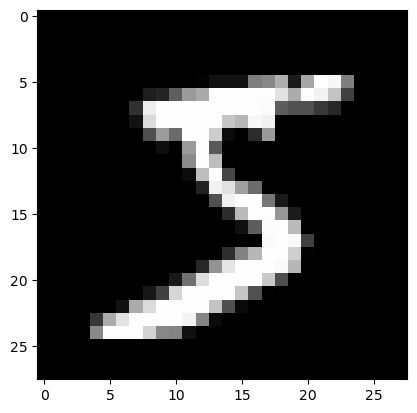

In [4]:
#Target variable
print(y)
print()

# First value in y
print(y[0])
print()

# Visualizing first value in y
plt.imshow(x[0].reshape(28,28),cmap ='grey')
plt.show()


In [5]:
#Checking shape of mnist dataset
#x- Total number of images in data - 70,000 and 
#784 is the number of pixels in each image
#y- 70,000 labels, each image has 1 label.

print(x.shape)
print(y.shape)


(70000, 784)
(70000,)


5. SPLITTING DATA INTO TRAIN,VALIDATION,TEST DATA: 

In [6]:
# Since the MNIST dataset (70,000 images) takes a long 
# time to process, we use a smaller subset for 
# training(15000), validation(5,000), and testing(5,000).

x_train = x[ :15000]
y_train = y[ :15000]
x_val = x[15000:20000]
y_val = y[15000:20000]
x_test = x[20000:25000]
y_test = y[20000:25000]


In [7]:
#Normalizing data 
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

PCA

In [8]:
# # Apply PCA to dataset to reduce dimentionality
# pca = PCA(n_components=0.90)  
# x_train_pca = pca.fit_transform(x_train)
# x_val_pca = pca.transform(x_val)
# x_test_pca = pca.transform(x_test)



In [9]:
#joblib.dump(pca,"pca_model.pk1")


In [10]:
#pca = joblib.load("pca_model.pk1")

SCALING DATA: Standardizing the data 

In [11]:
# # scalar = StandardScaler()
# x_train_scaled = scalar.fit_transform(x_train_pca) # fit and transform training data
# x_val_scaled = scalar.transform(x_val_pca) # only transform validation data
# x_test_scaled = scalar.transform(x_test_pca) # only transform test data


6. MODEL SELECTION : Here we consider using 3 models and try to find out which model suits the best. We start with 1.Support vector Classifier and 
#2.Random Forest Model,3. Ensemble Model.


**SUPPORT VECTOR MACHINE**

In [ ]:
# Train the scaled data

svm_rbf = SVC(kernel='rbf', gamma='scale', C=1, random_state=42)
svm_rbf.fit(x_train, y_train)


SVC(C=1, random_state=42)

In [13]:
#Check parameters in the svm model
print(svm_rbf.get_params())

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Grid Search for betterment of model score using hyperparameters

In [14]:
parameter_grid = {'C':[10,100],
               'gamma' : [0.001,0.01,0.1,'scale']}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Svm_hyp = GridSearchCV(SVC(kernel='rbf', 
                           random_state=42), 
                           parameter_grid,  
                           cv=cv, 
                           scoring='accuracy', 
                           n_jobs=-1)
Svm_hyp = Svm_hyp.fit(x_train,y_train)


In [15]:
Svm_hyp.best_params_

{'C': 10, 'gamma': 'scale'}

Evaluate SVM model


In [16]:

#SVM Model accuracy score using Grid Search
y_val_pred = Svm_hyp.predict(x_val)
print(accuracy_score(y_val,y_val_pred))

0.9728


 Save SVM model(gridsearch) using Joblib 

In [17]:
# Import joblib and dump the model into it

joblib.dump(Svm_hyp,'svm_model.pk1')


['svm_model.pk1']

**RANDOM FOREST MODEL**

In [18]:
# random forest model using hyper parameters
param_grid = {'n_estimators': [500,600],   # Number of trees in the forest
                'max_depth': [None, 1, 2, 5, 10],  
                'min_samples_split': [2, 5, 10],       
                'min_samples_leaf': [1, 2, 4],        
                'max_features': ['sqrt', 'log2']    
                }

random_forest = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                             param_grid = param_grid,
                             cv = 3,
                            n_jobs=-1,
                            verbose=2)
random_forest.fit(x_train, y_train)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [500, 600]},
             verbose=2)

In [19]:
random_forest.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

Evaluate Random forest model

In [20]:
y_val_pred1 = random_forest.predict(x_val)
print(accuracy_score(y_val,y_val_pred1))


0.958


Save Random Forest model

In [21]:
joblib.dump(random_forest,'rf_model.pk1')


['rf_model.pk1']

**ENSEMBLE MODEL**

In [22]:
# load saved models
svm_model = joblib.load('svm_model.pk1')
rf_model = joblib.load('rf_model.pk1')


Ensemble model using Voting Classifier

In [23]:
ensemble_model = VotingClassifier(estimators=[('svm',svm_model),
                                              ('rf',rf_model)],
                                        voting='hard')
ensemble_model.fit(x_train,y_train)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


VotingClassifier(estimators=[('svm',
                              GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                           estimator=SVC(random_state=42),
                                           n_jobs=-1,
                                           param_grid={'C': [10, 100],
                                                       'gamma': [0.001, 0.01,
                                                                 0.1,
                                                                 'scale']},
                                           scoring='accuracy')),
                             ('rf',
                              GridSearchCV(cv=3,
                                           estimator=RandomForestClassifier(random_state=42),
                                           n_jobs=-1,
                                           param_grid={'max_depth': [None, 1, 2,
                                                                     5, 10],
                                                       'max_features': ['sqrt',
                                                                        'log2'],
                                                       'min_samples_leaf': [1,
                                                                            2,
                                                                            4],
                                                       'min_samples_split': [2,
                                                                             5,
                                                                             10],
                                                       'n_estimators': [500,
                                                                        600]},
                                           verbose=2))])

Evaluate Ensemble model

In [24]:
y_val_pred2 = ensemble_model.predict(x_val)
accuracy_score(y_val,y_val_pred2)


0.9666

Save Ensemble model


In [25]:
joblib.dump(ensemble_model,'ensem.pk1')
ensem_model = joblib.load('ensem.pk1')

Now based on validation scores we select one best model

In [26]:
#creating dictionary of models and accuracy score.
models = {"SVM":svm_model,"RandomForest":rf_model,"Ensemble": ensem_model}
Accuracies = {"SVM":0.976,"RandomForest":0.9418,"Ensemble":0.9596}

best_model_name ,best_accuracy = max(Accuracies.items(), key=lambda x: x[1])
best_model = models[best_model_name] 
print(f"Best Model : {best_model_name}  with accuracy of {best_accuracy:.4f}")

Best Model : SVM  with accuracy of 0.9760


Saving best model (SVM) with all validation and test data 

In [45]:
print(joblib.dump(best_model, 'best_model_svm.pkl'))

best_model_svm = joblib.load('best_model_svm.pkl')

['best_model_svm.pkl']


**Evaluations with test data**

In [41]:
y_pred_test = best_model_svm.predict(x_test)
y_pred_test


array([5, 9, 7, ..., 2, 9, 9], dtype=uint8)

In [42]:
#Test accuracy 
test_accuracy = accuracy_score(y_test,y_pred_test)
print(f"SVM model accuracy with test data :{test_accuracy:.4f}")



SVM model accuracy with test data :0.9718


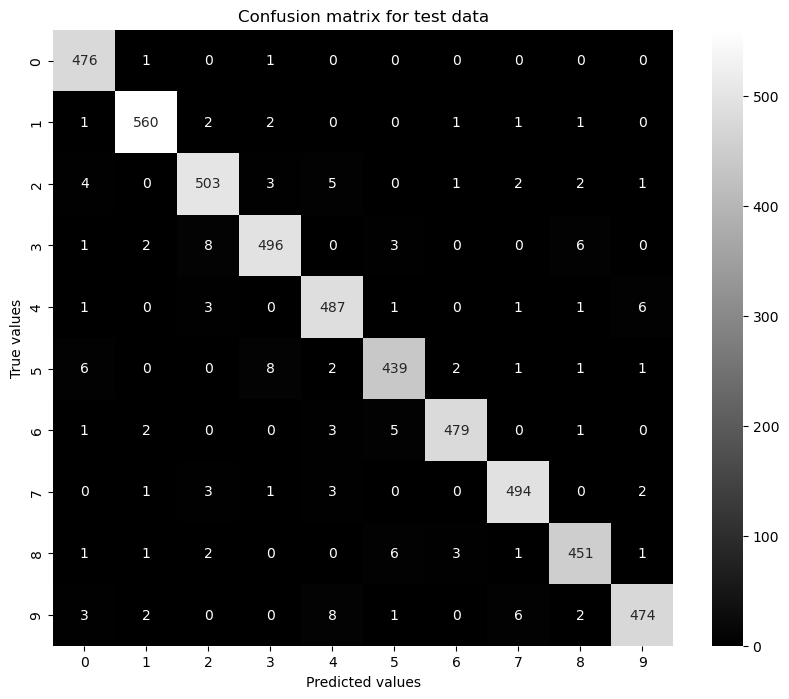

In [36]:
#Confusion matrix
confusion_mat = confusion_matrix(y_test,y_pred_test)

plt.figure(figsize =(10,8))
sns.heatmap(confusion_mat,annot=True,cmap='gray',fmt='d')

plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion matrix for test data')
plt.show()

In [37]:
#Classification report
clsreport = classification_report(y_test,y_pred_test)
print("Classificatio report:\n" ,clsreport)


Classificatio report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       478
           1       0.98      0.99      0.99       568
           2       0.97      0.97      0.97       521
           3       0.97      0.96      0.97       516
           4       0.96      0.97      0.97       500
           5       0.96      0.95      0.96       460
           6       0.99      0.98      0.98       491
           7       0.98      0.98      0.98       504
           8       0.97      0.97      0.97       466
           9       0.98      0.96      0.97       496

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000

